# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [3]:
import pandas as pd 
import numpy as np

In [4]:
df_data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [7]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')
# df_data["TotalCharges"] = df_data["TotalCharges"].astype("float", errors='ignore')

In [8]:
df_data["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## Manejo de datos nulos

In [9]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df_data.dropna(inplace=True)

## Eliminar id

In [11]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# df_data.drop('customerID',axis=1,inplace=True)
df_data.drop(columns= ['customerID'], inplace=True)

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Convertir a numérico variable objetivo

In [15]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [26]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [27]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [62]:
df_data_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

## Analisis de correlación

### Sobre Dataset completo

In [22]:
import matplotlib.pyplot as plt

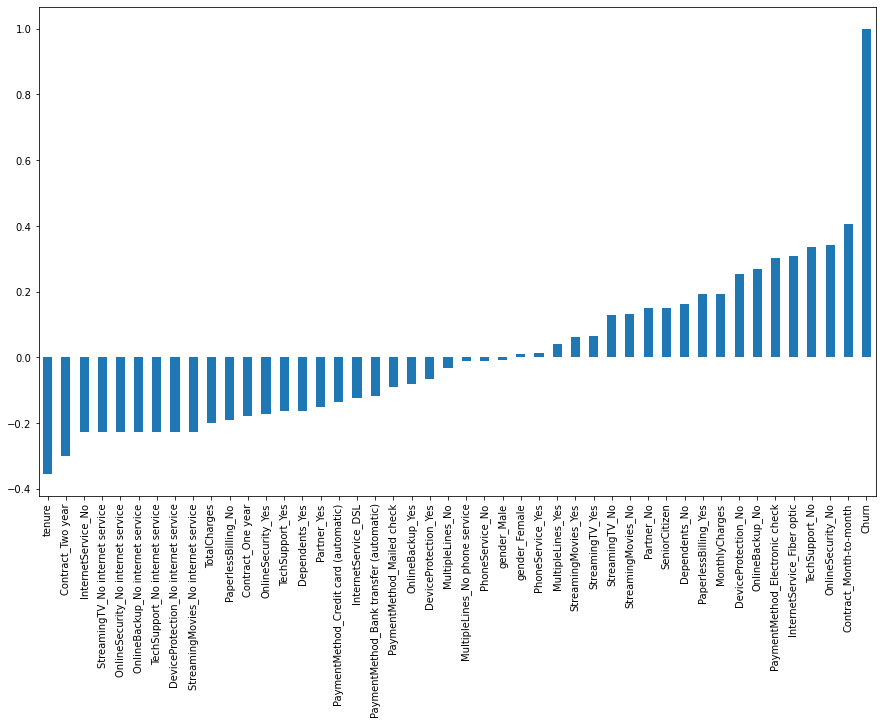

In [61]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

### Dividiendo Datasets

In [19]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting X and y
X = df_data_processing.copy()
y = df_data_processing.Churn

# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)


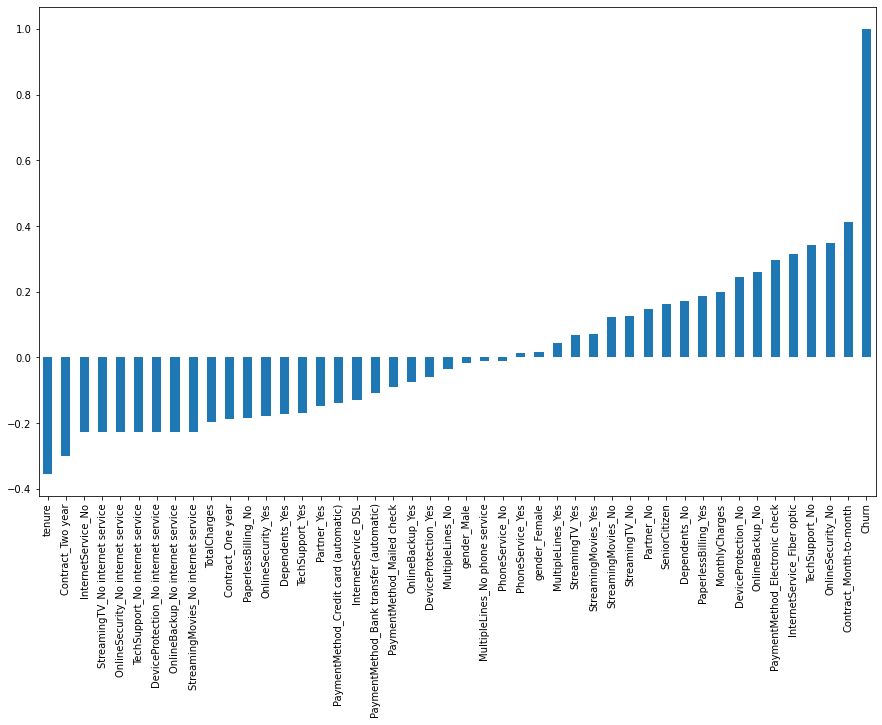

In [20]:
fig = plt.figure(figsize=(15,9))
X_train.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

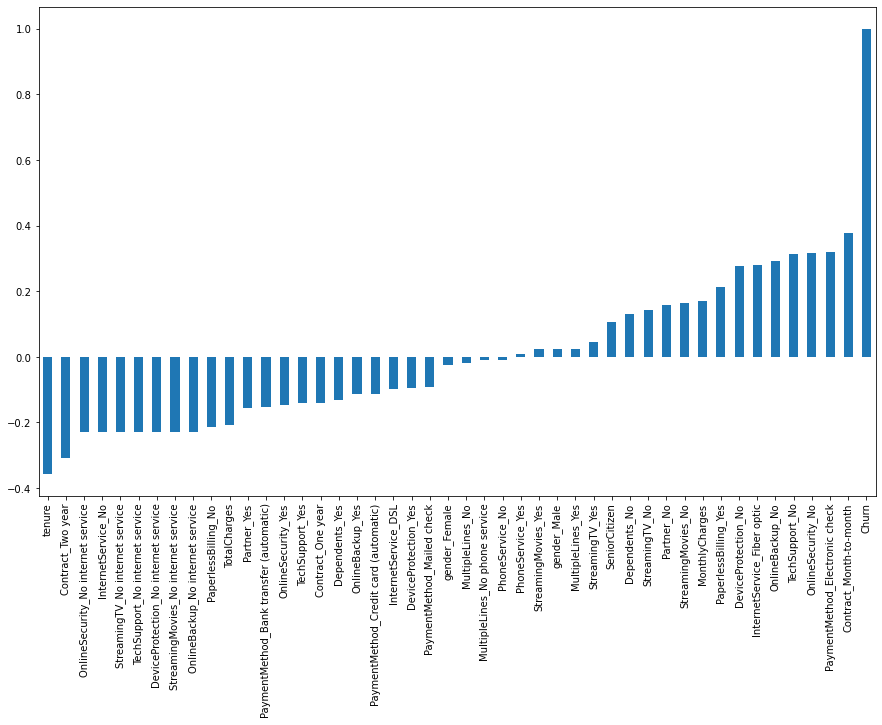

In [21]:
fig = plt.figure(figsize=(15,9))
X_test.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

### Sobre Dataset completo

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [24]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [25]:
df_data_processing_scaled.columns = df_data_processing.columns

In [27]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Dividiendo Datasets

In [28]:
# Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [29]:
X_train_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.591549,0.306468,0.237406,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.028169,0.349751,0.019600,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.760563,0.592040,0.512269,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.619718,0.362189,0.292507,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.760563,0.822388,0.626561,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
X_test_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.845070,0.067164,0.171118,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.253521,0.064179,0.051581,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.169014,0.835821,0.154645,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.507042,0.366169,0.232162,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.070423,0.111443,0.016455,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Análisis exploratorio de datos

In [21]:
import seaborn as sns

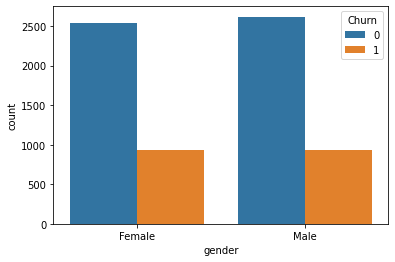

In [24]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [33]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [26]:
column_cat = df_data.select_dtypes(include='object').columns

In [31]:
# for _ in column_cat:
#     plot_categorial(_)

<Figure size 720x720 with 0 Axes>

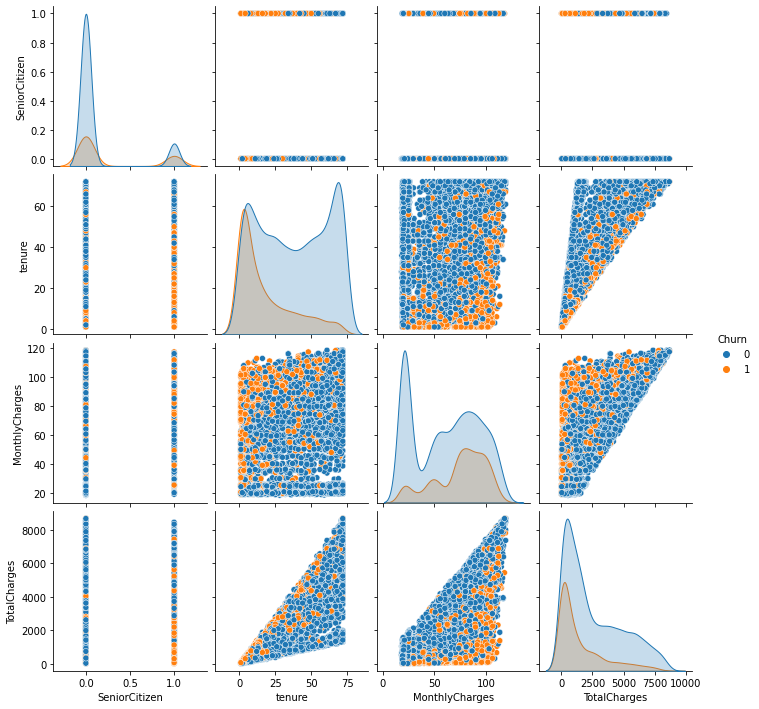

In [28]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

### Mejorando EDA

#### Categóricos

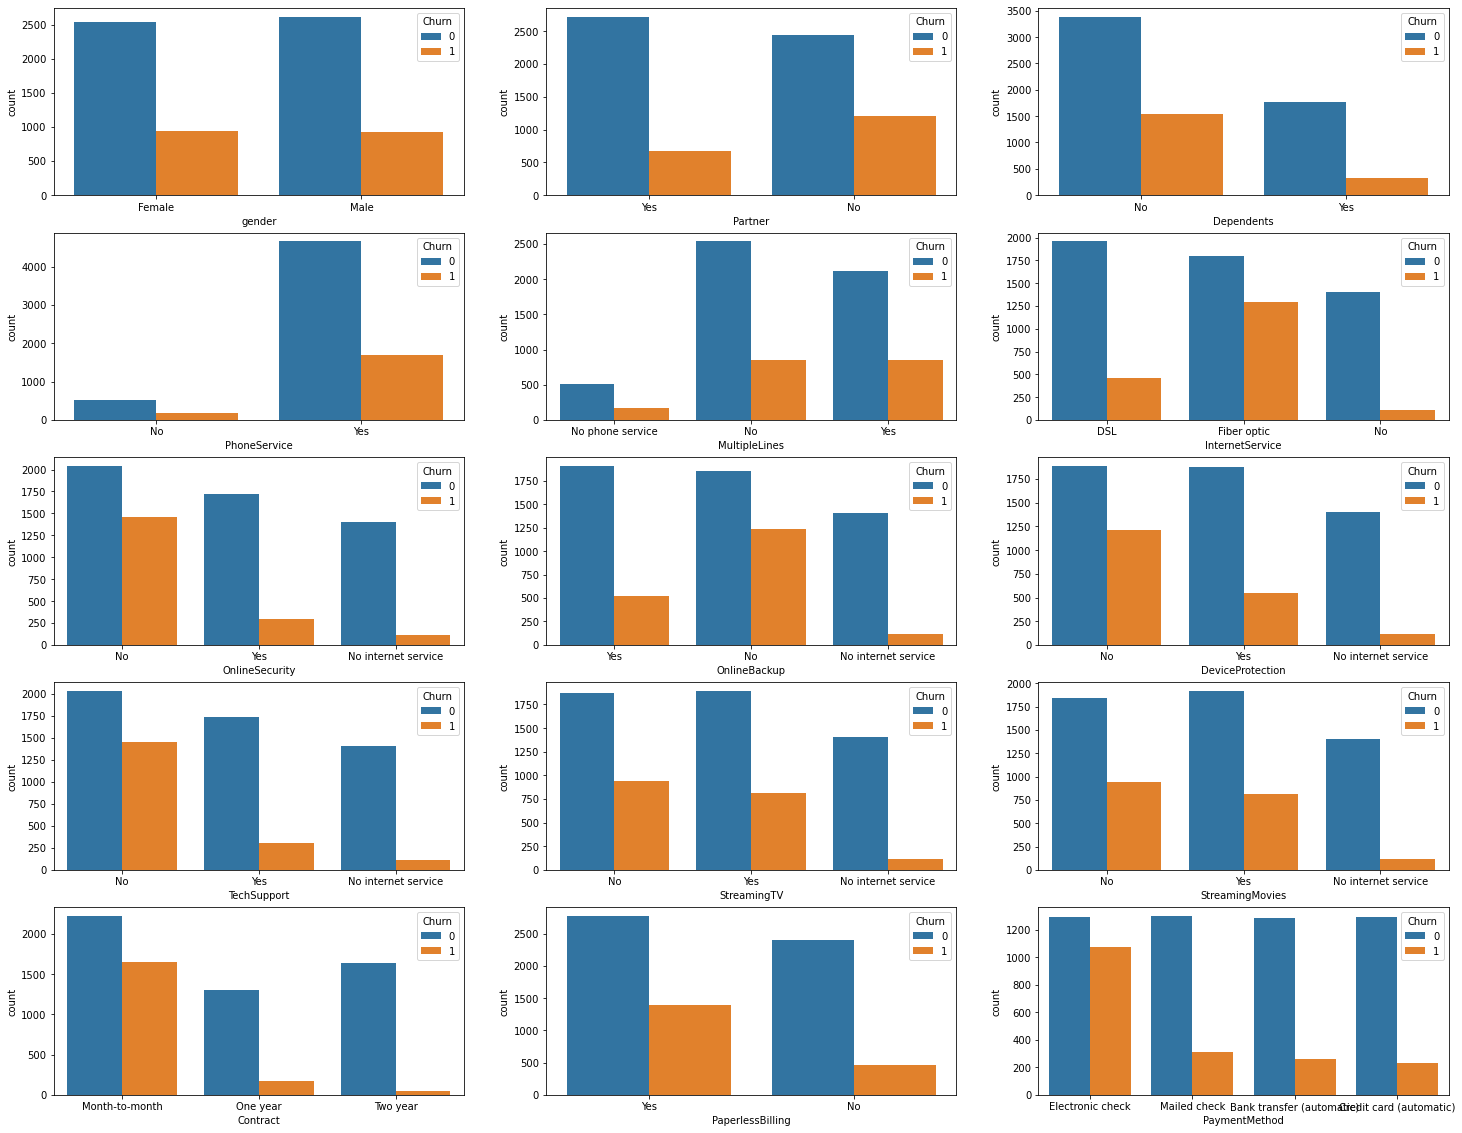

In [38]:
import seaborn as sns
columns_cat = df_data.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(25, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_data, x=var,hue='Churn', ax=ax)

#### Numéricos

<Figure size 1440x720 with 0 Axes>

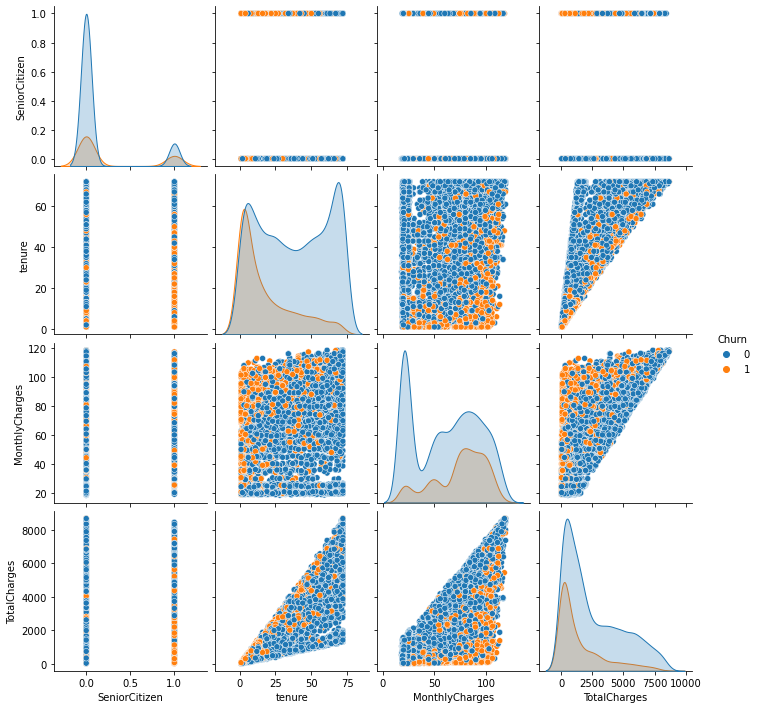

In [41]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

### Dataset Completo

In [75]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/home/argarcia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))
print(metrics.f1_score(y_test,prediction_test ))

0.795734597156398
0.5803310613437197


In [52]:
from sklearn.metrics import classification_report
report = classification_report(y_test, prediction_test)

In [53]:
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Aplicando Division

In [63]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting X and y

y = df_data_processing["Churn"]
X = df_data_processing.copy()
X.drop(columns=["Churn"],inplace=True)

# # Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# # Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [64]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [65]:
prediction_test = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,prediction_test ))
print(metrics.f1_score(y_test,prediction_test ))

0.795734597156398
0.5803310613437197


In [66]:
report = classification_report(y_test, prediction_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Aplicando Div & RandomOverSampler

In [60]:
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [67]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting X and y

y = df_data_processing["Churn"]
X = df_data_processing.copy()
X.drop(columns=["Churn"],inplace=True)

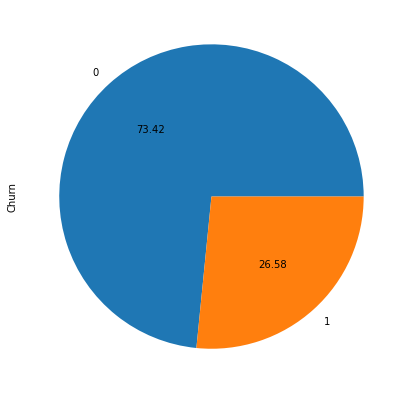

In [68]:
fig = plt.figure(figsize=(7,7))
y.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [69]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

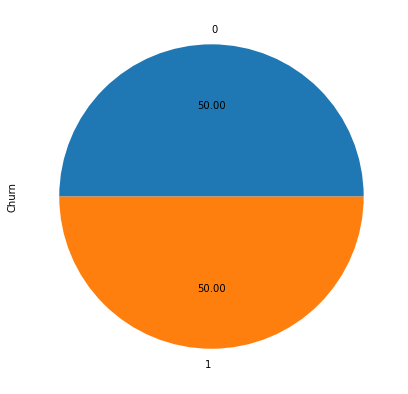

In [70]:
fig = plt.figure(figsize=(7,7))
y_res.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [123]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            10326 non-null  int64  
 1   tenure                                   10326 non-null  int64  
 2   MonthlyCharges                           10326 non-null  float64
 3   TotalCharges                             10326 non-null  float64
 4   gender_Female                            10326 non-null  uint8  
 5   gender_Male                              10326 non-null  uint8  
 6   Partner_No                               10326 non-null  uint8  
 7   Partner_Yes                              10326 non-null  uint8  
 8   Dependents_No                            10326 non-null  uint8  
 9   Dependents_Yes                           10326 non-null  uint8  
 10  PhoneService_No                          10326

In [72]:
# # Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

# # Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [73]:
y_test.value_counts()

0    1574
1    1524
Name: Churn, dtype: int64

In [74]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)

In [75]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_predict ))
print(metrics.f1_score(y_test,y_predict ))

0.7666236281471918
0.7744149765990639


In [76]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)

In [77]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1574
           1       0.74      0.81      0.77      1524

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



### Aplicando Div & SMOTE(synthetic minority oversampling technique)

In [119]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting X and y

y = df_data_processing["Churn"]
X = df_data_processing.copy()
X.drop(columns=["Churn"],inplace=True)

In [107]:
from imblearn.over_sampling import SMOTE

#ros = RandomOverSampler(sampling_strategy=1) # Float
sm = SMOTE(sampling_strategy='auto') # String
X_sm, y_sm = sm.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f13b0bcfa60>
Traceback (most recent call last):
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


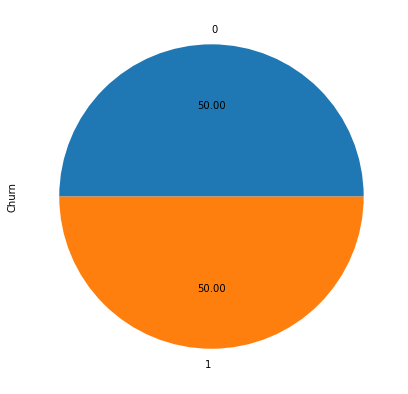

In [108]:
fig = plt.figure(figsize=(7,7))
y_sm.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [109]:
# # Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3)

# # Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [103]:
y_train.value_counts()

1    3631
0    3597
Name: Churn, dtype: int64

In [112]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)

In [113]:
print(metrics.accuracy_score(y_test,y_predict ))
print(metrics.f1_score(y_test,y_predict ))

0.8511943189154293
0.8482054659203161


In [114]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1542
           1       0.87      0.83      0.85      1556

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



### Aplicando Div & SMOTENN(synthetic minority oversampling technique)

In [121]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.combine import SMOTEENN
# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape %s' % Counter(y))

In [142]:
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings("ignore")

In [147]:
y.values

array([0, 0, 1, ..., 0, 1, 0])

In [146]:
sme = SMOTEENN()
X_sme, y_sme = sme.fit_resample(X,y)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f13b0bcf5e0>
Traceback (most recent call last):
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f13b0a05670>
Traceback (most recent call last):
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

In [141]:
y_sme.value_counts()

1    3186
0    2641
Name: Churn, dtype: int64

In [137]:
X_sme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5827 non-null   int64  
 1   tenure                                   5827 non-null   int64  
 2   MonthlyCharges                           5827 non-null   float64
 3   TotalCharges                             5827 non-null   float64
 4   gender_Female                            5827 non-null   uint8  
 5   gender_Male                              5827 non-null   uint8  
 6   Partner_No                               5827 non-null   uint8  
 7   Partner_Yes                              5827 non-null   uint8  
 8   Dependents_No                            5827 non-null   uint8  
 9   Dependents_Yes                           5827 non-null   uint8  
 10  PhoneService_No                          5827 no

In [138]:
# # Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_sme, y_sme, test_size=0.3)

# # Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [139]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_predict ))
print(metrics.f1_score(y_test,y_predict ))
report = classification_report(y_test, y_predict)
print(report)

0.9439679817038308
0.948093220338983
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       807
           1       0.95      0.95      0.95       942

    accuracy                           0.94      1749
   macro avg       0.94      0.94      0.94      1749
weighted avg       0.94      0.94      0.94      1749



### Borrando features no buenos

In [156]:
df_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [177]:
#Eliminamos los features que no presentan un alto grado de correlacion
df_data2 = df_data.copy()
df_data2 = df_data2.drop(['PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV'], axis=1)

#Convertimos las variables categoricas a numericas y normalizamos los datos
df_data2 = pd.get_dummies(df_data2)

In [178]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Selecting X and y

y = df_data2["Churn"]
X = df_data2.copy()
X.drop(columns=["Churn"],inplace=True)


#ros = RandomOverSampler(sampling_strategy=1) # Float
sm = SMOTE(sampling_strategy='auto') # String
X_sm, y_sm = sm.fit_resample(X, y)


# # Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3)

# # Scaling Data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f13b09d0e50>
Traceback (most recent call last):
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/argarcia/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [179]:
model = LogisticRegression(max_iter=10000, penalty='elasticnet',solver='saga', l1_ratio =.7)
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_predict ))
print(metrics.f1_score(y_test,y_predict ))
report = classification_report(y_test, y_predict)
print(report)

0.841187863137508
0.8362183754993342
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1593
           1       0.84      0.83      0.84      1505

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



## Evaluación del modelo

In [34]:
model.predict_proba(X_test)

array([[0.99021177, 0.00978823],
       [0.86177511, 0.13822489],
       [0.30193033, 0.69806967],
       ...,
       [0.9902827 , 0.0097173 ],
       [0.70132399, 0.29867601],
       [0.82865287, 0.17134713]])

In [35]:
model.coef_

array([[ 2.16456990e-01, -3.10072660e+00, -1.62292340e-01,
         1.19636831e+00,  9.43016868e-04, -2.24737354e-02,
        -7.14909690e-02,  4.99602504e-02,  1.16812883e-01,
        -1.38343602e-01,  8.51173107e-02, -1.06648029e-01,
        -1.58852500e-01,  8.51173107e-02,  5.22044710e-02,
        -4.17808188e-01,  5.11413449e-01, -1.15135980e-01,
         2.40094138e-01, -1.15135980e-01, -1.46488877e-01,
         8.40801258e-02, -1.15135980e-01,  9.52513520e-03,
         5.65235946e-02, -1.15135980e-01,  3.70816665e-02,
         2.20220334e-01, -1.15135980e-01, -1.26615073e-01,
        -8.59172265e-02, -1.15135980e-01,  1.79522487e-01,
        -8.76596177e-02, -1.15135980e-01,  1.81264879e-01,
         7.42707461e-01, -9.75358724e-02, -6.66702307e-01,
        -1.13985776e-01,  9.24550579e-02, -2.72279162e-03,
        -1.58695884e-01,  2.16926872e-01, -7.70389150e-02]])

In [36]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

AxesSubplot(0.125,0.125;0.775x0.755)


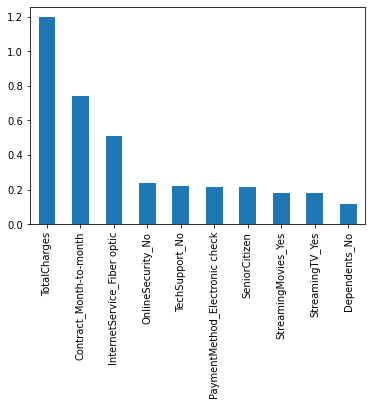

In [37]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


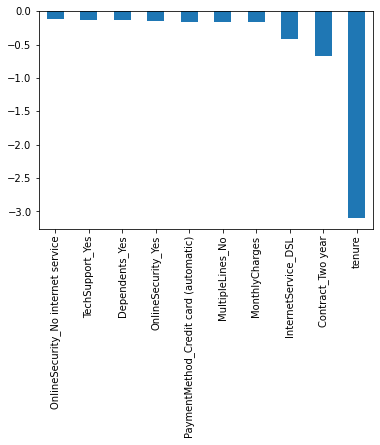

In [38]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

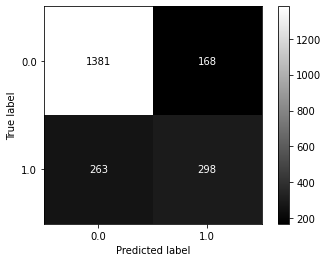

In [42]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()